<a href="https://colab.research.google.com/github/Vedarham/PyTorch_Fundamentals_ZTM_YT/blob/main/00_pytorch_fundamentals_ZTM1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 00. Pytorch Fundamentals

Resorce notebook: https://www.learnpytorch.io/00_pytorch_fundamentals/

In [ ]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [ ]:
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
print(torch.__version__)

2.6.0+cu124


## Introduction to tensors

### Creating tensors

Pytorch tensors created using torch.Tensor() https://pytorch.org/docs/stable/tensors.html

by def: alll data type is tensor

In [ ]:
#scalar

scalar = torch.tensor(7)
scalar

tensor(7)

In [ ]:
scalar.ndim

0

In [ ]:
#Get tensor bak as python int
scalar.item()

7

In [ ]:
# Vector
vector = torch.tensor([7,7])
vector

tensor([7, 7])

In [ ]:
vector.ndim

1

In [ ]:
vector.shape

torch.Size([2])

In [ ]:
# MATRIX
MATRIX = torch.tensor([[7,8],[9,10]])
MATRIX

tensor([[ 7,  8],
        [ 9, 10]])

In [ ]:
MATRIX.ndim

2

In [ ]:
MATRIX[0]

tensor([7, 8])

In [ ]:
MATRIX.shape


torch.Size([2, 2])

In [ ]:
# TENSOR
TENSOR = torch.tensor([[[1,2,3,4],[3,4,5,5],[7,3,2,6]],[[2,3,3,3],[2,3,3,3],[2,3,3,3]]])
TENSOR

tensor([[[1, 2, 3, 4],
         [3, 4, 5, 5],
         [7, 3, 2, 6]],

        [[2, 3, 3, 3],
         [2, 3, 3, 3],
         [2, 3, 3, 3]]])

In [ ]:
TENSOR.ndim

3

In [ ]:
TENSOR.shape

torch.Size([2, 3, 4])

In [ ]:
TENSOR[0]

tensor([[1, 2, 3, 4],
        [3, 4, 5, 5],
        [7, 3, 2, 6]])

In [ ]:
# Uppercase letter for MATRIX AND TENSOR IS conventional

### Random Tensors

Why random Tensors ?
  They are important as many neural networks learns is that they start with tensors full of random numbers and then adjust  those random numbers to better represent data

  `CRUX ::> START with random Numbers -> LOOK at data -> UPDATE the data -> LOOK at the data -> UPDATE the random Numbers`


  Torch random tensors : https://pytorch.org/docs/stable/generated/torch.rand.html
  

In [ ]:
#  CREATE A RANDOM TENSORS OF SIZE(3,4) OR SHAPE

random_tensor = torch.rand(3,4)
random_tensor

tensor([[0.6773, 0.1715, 0.3157, 0.0242],
        [0.9679, 0.1601, 0.5315, 0.9573],
        [0.5951, 0.2024, 0.6635, 0.9698]])

In [ ]:
random_tensor.ndim

2

In [ ]:
# Create a random tensor with a similar shape to an image tensor

random_image_size_tensor = torch.rand(size=(224,224,3))
#  height, width , color channel // color channels can come first as well 3 , 224,224 like this

random_image_size_tensor.shape , random_image_size_tensor.ndim

(torch.Size([224, 224, 3]), 3)

###  Zeros and Ones

In [ ]:
# Create a tensor of all zeros

zeros = torch.zeros(size=(3,4))
zeros

tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])

In [ ]:
# Create a tensor of all ones

ones = torch.ones(size=(3,4))
ones

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])

In [ ]:
ones.dtype

torch.float32

### Create a range of tensors and tensors-like

Ref. https://pytorch.org/docs/stable/generated/torch.arange.html


In [ ]:
# Use torch.range() --> new ver. .arange()

one_to_ten = torch.arange(start=1, end =10 ,step =1)
one_to_ten
# n-1 end

tensor([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
#  Creating tensors like --> same shape we use like method

ten_zeroes = torch.zeros_like(input=one_to_ten)
ten_zeroes

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0])

### Tensor Datatypes

**Note: ** Tensor Datatypes is one of the big errors you'll run into in pytorch & deep learning

1. Tensors not right datatype
2. Tensor not right shap
3. Tensors not one right device


Precision in  Computing : https://en.wikipedia.org/wiki/Precision_(computer_science)

In [ ]:
# Float 32 tensor
float_32_tensor = torch.tensor([3.0,6.0,9.0],
                               dtype=torch.float16, # data type is tensor (eg: float32 float16) for precision
                               device = None, # which device is your tensor  by default: CPU -> change to cuda
                               requires_grad=False) # whether or not to track gradients with this tensor operations
float_32_tensor
# by default : none = float32

tensor([3., 6., 9.], dtype=torch.float16)

In [ ]:
float_32_tensor.dtype

torch.float16

In [ ]:
float_16_tensor = float_32_tensor.type(torch.float16)
float_16_tensor

tensor([3., 6., 9.], dtype=torch.float16)

In [ ]:
float_16_tensor * float_32_tensor

# Some DataTypes would have un into error of being not right DataType ; but some , like this provides results

tensor([ 9., 36., 81.], dtype=torch.float16)

In [ ]:
int_32_tensor = torch.tensor([3,6,9], dtype= torch.int32)
int_32_tensor

tensor([3, 6, 9], dtype=torch.int32)

In [ ]:
int_32_tensor*float_16_tensor

tensor([ 9., 36., 81.], dtype=torch.float16)

### Getting  Information from Tensor (using Tensor Attributes)

1. Tensors not right datatype - to get datatype from tensor, can use `tensor.datatype`
2. Tensor not right shape - to get shape from a tensor, can use `tensor.shape` which is equivalent to function `tensor.size()`
3. Tensors not one right device - to get device from a tensor , can use ` tensor.devices`

In [ ]:
# Create Tensor

some_tensor = torch.rand(3,4)

some_tensor

tensor([[0.2163, 0.4450, 0.9663, 0.1120],
        [0.4731, 0.7861, 0.8990, 0.2944],
        [0.0241, 0.3474, 0.3427, 0.1218]])

In [ ]:
#  Find out Details about some Tensor
print(some_tensor)
print(f"DataType of tensor : {some_tensor.dtype} \nShape of Tensor: {some_tensor.shape} \nDevice of Tensor {some_tensor.device}")

tensor([[0.2163, 0.4450, 0.9663, 0.1120],
        [0.4731, 0.7861, 0.8990, 0.2944],
        [0.0241, 0.3474, 0.3427, 0.1218]])
DataType of tensor : torch.float32 
Shape of Tensor: torch.Size([3, 4]) 
Device of Tensor cpu


### Manipulating Tensors (tensor Operations)

Tensor Operations Include:
* Addition
* Subtractiom
* Multiplication (element-wise)
* Division
* Matrix Multiplication

In [ ]:
#  Addition

tensor = torch.tensor([1,2,3])
tensor +10

tensor([11, 12, 13])

In [ ]:
# Multiply

tensor *10

tensor([10, 20, 30])

In [ ]:
tensor

tensor([1, 2, 3])

In [ ]:
tensor *= 10
tensor # reassigning

tensor([10, 20, 30])

In [ ]:
# Subtraction
tensor - 10

tensor([ 0, 10, 20])

In [ ]:
# Divison
tensor/10

tensor([1., 2., 3.])

In [ ]:
# Try Out PyTorch Inbuilt Functions

torch.add(tensor,10)
torch.mul(tensor,10)

tensor([100, 200, 300])

### Matrix Multiplication

Two main ways of performin multiplication in NN and DL :
 1. Element-wise Multiplication
 2. Matrix Multiplication ( dot product )


 There are 2 main rules, cared off while performing matrix multi.
1. **Inner dimensions must match** : `(x,y) @ (y,z)`
2. **Resulting matrix has shape of outer dimensions** i.e. : `(x,z)`

In [ ]:
print( tensor ,  "*" , tensor)
print(f"Equals: {tensor*tensor}")

tensor([10, 20, 30]) * tensor([10, 20, 30])
Equals: tensor([100, 400, 900])


In [ ]:
# Matrix Multiplication : uses very less tome i.e. 10x faster than forLoop
%%time
torch.matmul(tensor,tensor)

# MM by hand:
10*10+20*20+30*30

#Using for-loop:

CPU times: user 1.43 ms, sys: 0 ns, total: 1.43 ms
Wall time: 8.49 ms


1400

In [ ]:
%%time
value =0
for i in range(len(tensor)):
  value+=tensor[i]*tensor[i]
print(value)

tensor(1400)
CPU times: user 1.58 ms, sys: 0 ns, total: 1.58 ms
Wall time: 1.54 ms


### One of he most common errors in Deep Learning : Shape Errors

In [ ]:
# Shapes for matrix multipliation

tensor_A = torch.tensor([[1,2],
                        [3,4],
                        [5,6]])

tensor_B = torch.tensor([[7,8],[8,10],[9,12]])


torch.mm(tensor_A,tensor_B)  #Alias for matmul

RuntimeError: mat1 and mat2 shapes cannot be multiplied (3x2 and 3x2)

In [ ]:
tensor_B.shape , tensor_A.shape

(torch.Size([3, 2]), torch.Size([3, 2]))

To fix our tensor shape issue , we can manipulate the shape of one of tensors using Transpose

A **Transpose** switches the axes or dimensions of a given tensor


In [ ]:
tensor_BT =tensor_B.T
tensor_BT.shape

torch.Size([2, 3])

In [ ]:
output = torch.mm(tensor_A, tensor_BT)
output
output.shape

torch.Size([3, 3])

## Finding min , max ,mean , sun , ... (Tensor Aggregation)

In [ ]:
x = torch.arange(0,100,10)
x

tensor([ 0, 10, 20, 30, 40, 50, 60, 70, 80, 90])

In [ ]:
torch.min(x), x.min()

(tensor(0), tensor(0))

In [ ]:
torch.max(x), x.max()

(tensor(90), tensor(90))

In [ ]:
x.dtype
#x.dtype is int64 so error hence convert to Long to perform Mean (float or complex)
y = x.type(torch.float32)
torch.mean(y) , y.mean()

(tensor(45.), tensor(45.))

In [ ]:
torch.sum(x) , x.sum()

(tensor(450), tensor(450))

## Finding positional min and max

In [ ]:
# Find the position in tensor which has the minimum value with argmin()-> returns index position tensor where min. value occurs
x.argmin() , x[0]

(tensor(0), tensor(0))

In [ ]:
# Find the position in tensor which has maximum value with argmax() -> returns the index position tensor where max. value occurs
x.argmax() ,x[9]


(tensor(9), tensor(90))

## Reshaping , stacking , squeezing , unsqueezing tensors

* Reshaping -> reshapes the input tensor to defined Shape
* View -> Return view of an input tensor of certain shape but keep the same memoryview
* Stacking -> combine multiple tensors on top of stack each other (vstack) or side-side (hstack)
* Squeeze -> removes all `1` dimensions from  a tensor
* Unsqueeze -> add a `1` dimension to a target tensor
* Permute -> Return a view of the input with dimensions permuted (swapped) in a certain way

In [ ]:
x = torch.arange(1.,10.)
x
x.shape

torch.Size([9])

In [ ]:
# Add an extra dimension
x_reshaped = x.reshape(1,9)
#  9x1 =9; if would have taken range 1. , 11. then 5,2 or 2,5 would have been compatible i.e. belong' size of 10

x_reshaped2 = x.reshape(9,1)
x_reshaped , x_reshaped.shape
x_reshaped2 , x_reshaped2.shape

(tensor([[1.],
         [2.],
         [3.],
         [4.],
         [5.],
         [6.],
         [7.],
         [8.],
         [9.]]),
 torch.Size([9, 1]))

In [ ]:
# Change the view
z= x.view(1,9)
z , z.shape

(tensor([[1., 2., 3., 4., 5., 6., 7., 8., 9.]]), torch.Size([1, 9]))

In [ ]:
  # Changing z changes x(because a view of a tensor shares the shares the same memory as the original input )
  z[: ,0] = 5
  z,x

(tensor([[5., 2., 3., 4., 5., 6., 7., 8., 9.]]),
 tensor([5., 2., 3., 4., 5., 6., 7., 8., 9.]))

In [ ]:
# Stack tensors on top of each other vstack dim =0 :: hstack dim =1
x_stacked = torch.stack([x,x,x,x], dim =0)
x_stacked

tensor([[5., 2., 3., 4., 5., 6., 7., 8., 9.],
        [5., 2., 3., 4., 5., 6., 7., 8., 9.],
        [5., 2., 3., 4., 5., 6., 7., 8., 9.],
        [5., 2., 3., 4., 5., 6., 7., 8., 9.]])

In [ ]:
# using squeeze on previous tensor :: torh.squeeze() -> removes all single dimension from a target tensor

print(f"Previous Tensor: {x_reshaped}" )
print(f"Previous Shape : {x_reshaped.shape}")

# Removing extra dimensions from x_reshaped

x_squeezed = x_reshaped.squeeze()
print(f"\n New Tensor: {x_squeezed}")
print(f"New Shape: {x_squeezed.shape}")

Previous Tensor: tensor([[5., 2., 3., 4., 5., 6., 7., 8., 9.]])
Previous Shape : torch.Size([1, 9])

 New Tensor: tensor([5., 2., 3., 4., 5., 6., 7., 8., 9.])
New Shape: torch.Size([9])


In [ ]:
# torch.unsqueeze() -> adds a single dimension to a target tensor at specfic dim(dimension)
x_unsqueezed = x_squeezed.unsqueeze(dim =0)
print(f"Unsqueezed Tensor: {x_unsqueezed}")
print(f"New Shape: {x_unsqueezed.shape}")

Unsqueezed Tensor: tensor([[5., 2., 3., 4., 5., 6., 7., 8., 9.]])
New Shape: torch.Size([1, 9])


In [ ]:
# torch.permute -> rearranges the dimensions of a target tensor in a specified order

x_original = torch.rand(size=(224,224,3))

# Permute the original tensor to rearrange the axis (or dim) order

x_permuted = x_original.permute(2,0,1) # shifts the axis 0->1 1->2 2->0
# L2R: 2 maps 224 0 maps sunsequent 224 and 1 maps 3 so we want order 2,0,1
# Note : dont consider indexing just consider mappings and shift

print(f"Previous Shape : {x_original.shape}")
print(f"permuted shape: {x_permuted.shape}")

# x_permuted shares same memory as x_original as permute is a view

Previous Shape : torch.Size([224, 224, 3])
permuted shape: torch.Size([3, 224, 224])


## Indexing (Selecting data from tensors)

Indexing with Pytroch is similar with Numpy

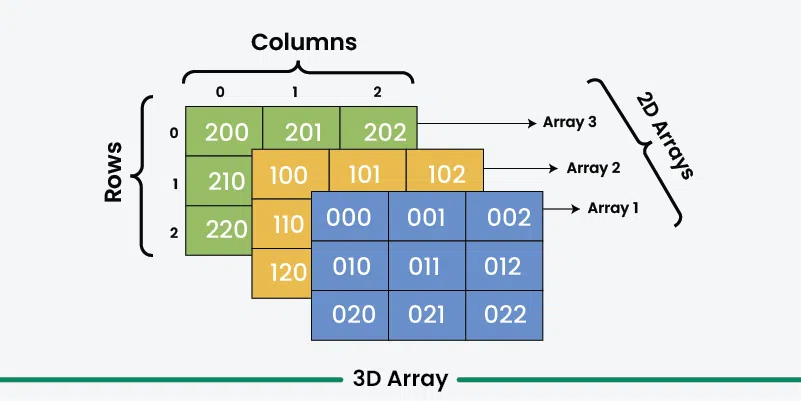


In [ ]:
x= torch.arange(1,10,1).reshape(1,3,3)
x,x.shape

(tensor([[[1, 2, 3],
          [4, 5, 6],
          [7, 8, 9]]]),
 torch.Size([1, 3, 3]))

In [ ]:
# Let's index on our new tensor , middle bracket(dim=1), most inner bracket (last dim)
x[0],x[0][0],x[0][0][0]

(tensor([[1, 2, 3],
         [4, 5, 6],
         [7, 8, 9]]),
 tensor([1, 2, 3]),
 tensor(1))

In [ ]:
# You can use also use " : " to select " all " of a target dimension

x[:,0]

tensor([[1, 2, 3]])

In [ ]:
# Get all  values of 0th and 1st dimension but only index 1 of 2nd dimension
x[:,:,1]

tensor([[2, 5, 8]])

In [ ]:
# get all values of the 0 dimension but only the first index value of 1st and 2nd dimension
x[:,1,1]

tensor([5])

In [ ]:
# get index 0 of 0th and 1st dimension and all values of 2nd dimension
x[0,0,:]

tensor([1, 2, 3])

In [ ]:
# Index on x to return
# a) 9
x[:,2,2]
# b)3,6,9
x[0,:,2] # or x[:,:,2]

tensor([3, 6, 9])

## PyTorch tensors and Numpy

Numpy is popular scientifuc numerical computing library,
And so this, Pytorch has functionality to interact with i
* Data in Numpy, want in Pytorch tensor -> `torch.from_numpy(ndarray)`
* Pytorch tensor -> Numpy -> `torch.Tensor.numpy()`

Note : `numpy_tensor` points to the same memory location as `tensor`

* `tensor + 1` creates a new tensor, so the original tensor and numpy_tensor are no longer connected.

* `tensor += 1` modifies the tensor in-place, so numpy_tensor, which shares the same memory as tensor, also reflects the change.

In [ ]:
# Numpy Array
import torch
import numpy as np

array = np.arange(1.0,8.0)
tensor = torch.from_numpy(array).type(torch.float32)
array, tensor


(array([1., 2., 3., 4., 5., 6., 7.]), tensor([1., 2., 3., 4., 5., 6., 7.]))

In [ ]:
array.dtype , tensor.dtype

# By default numpy datatype is float64 and torch is float32 s pytorch reflects default numpy's dt unless specified


(dtype('float64'), torch.float32)

In [ ]:
# Change the value of array what it will do `Tensor`?
array+=1
array,tensor
# doesn't change in tensor

(array([2., 3., 4., 5., 6., 7., 8.]), tensor([1., 2., 3., 4., 5., 6., 7.]))

In [ ]:
# Tensor to Numpy array
tensor = torch.ones(7)
numpy_tensor = tensor.numpy()
tensor, numpy_tensor , tensor.dtype , numpy_tensor.dtype

# Numpy as well reflects by default datatype of pytorch

(tensor([1., 1., 1., 1., 1., 1., 1.]),
 array([1., 1., 1., 1., 1., 1., 1.], dtype=float32),
 torch.float32,
 dtype('float32'))

In [ ]:
# Change the tensor what happens to`Numpy`?

tensor = tensor + 1
tensor, numpy_tensor
#  tensor+=1 in-place changes hence reflects numpy as well as they share same memory location pointer

(tensor([2., 2., 2., 2., 2., 2., 2.]),
 array([1., 1., 1., 1., 1., 1., 1.], dtype=float32))

## Reproducibility (trying to take random out of random)

In short how a neural network learns:

`start with random numbers -> tensor operations -> update random numbers to try and make them better representation of the data -> again -> again -> again ...`

To reduce randomness in NN and Pytorch comes the concept of **random seed**

Essentially what random seed does is "flavour" the randomness


ref: https://en.wikipedia.org/wiki/Random_seed

In [ ]:
random_tensor_A = torch.rand(3,4)
random_tensor_B = torch.rand(3,4)

print(random_tensor_A)
print(random_tensor_B)

print(random_tensor_A==random_tensor_B)


tensor([[0.1827, 0.4280, 0.8703, 0.1593],
        [0.0921, 0.7645, 0.7093, 0.9773],
        [0.1120, 0.5022, 0.7302, 0.0725]])
tensor([[0.5570, 0.0231, 0.7935, 0.9912],
        [0.4541, 0.1849, 0.2803, 0.5116],
        [0.5389, 0.2027, 0.2640, 0.1772]])
tensor([[False, False, False, False],
        [False, False, False, False],
        [False, False, False, False]])


In [ ]:
# Let's make some random but reproducable tensors

# set the random seed and to use it add above rand tensor creation
RANDOM_SEED = 369
torch.manual_seed(RANDOM_SEED)
random_tensor_C = torch.rand(3,4)

torch.manual_seed(RANDOM_SEED)
random_tensor_D = torch.rand(3,4)

print(random_tensor_C)
print(random_tensor_D)

print(random_tensor_C==random_tensor_D)

tensor([[0.3998, 0.6201, 0.9229, 0.0735],
        [0.8979, 0.8878, 0.9014, 0.5796],
        [0.4578, 0.3855, 0.9865, 0.2216]])
tensor([[0.3998, 0.6201, 0.9229, 0.0735],
        [0.8979, 0.8878, 0.9014, 0.5796],
        [0.4578, 0.3855, 0.9865, 0.2216]])
tensor([[True, True, True, True],
        [True, True, True, True],
        [True, True, True, True]])


## Running tensor and pytorch objects on GPUs (and making faster compution)

GPUs = faster computation on  numbers, thanks to cuda + NVIDIA hardware + Pytorch working behind scenes to make everything hunky dory (good)

### 1. Getting GPU
1. Easiest = Use Google Colab  for a free  GPU (options to upgrade as well)
2. use your own GPU - takes a bit setups and require investmen of Purchasing GPU, many opts

: See this post for ref: https://timdettmers.com/category/deep-learning/

3. Use Cloud Computing GCP , AWS , AZURE - can lend GPUs on cloud and use 'em

for 2,3 Pytorch + GPU drivers (CUDA) takes bit setup , doc ref: https://pytorch.org/get-started/locally/

### Check for GPU access with Pytorch

* For pytorch since it's capable of running compute on GPU or CPU , it's best practice to setup device agnbostic code : https://pytorch.org/docs/stable/notes/cuda.html#device-agnostic-code

E.g. : run on GPU if available, else default to CPU

In [ ]:
# Check for GPU access with PyTorch
import torch
!nvidia-smi
torch.cuda.is_available()

/bin/bash: line 1: nvidia-smi: command not found


False

In [ ]:
#  Setup Device agnostic code

device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [ ]:
# count  number of device
torch.cuda.device_count()

0

## 3. Putting tensors (and models) on the GPU
The reason we want our tensors/models on GPU is because using a GPU results in faster computation

In [ ]:
# By default tensor is on CPU
tensor = torch.tensor([1,2,3], device="cpu")
# tensor not on GPU
print(tensor, tensor.device)

tensor([1, 2, 3]) cpu


In [ ]:
# Move tensor to gpu (if available)

tensor_on_gpu = tensor.to(device)
tensor_on_gpu

tensor([1, 2, 3])

### 4. Moving tesors back to cpu

In [ ]:
#  If Tensor is on GPU, can't transform it to Numpy

tensor_on_gpu.numpy()

# TypeError: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.

array([1, 2, 3])

In [ ]:
# To fix the GPU tensor with numpy issue, we can first set it on CPu

tensor_back_on_cpu = tensor_on_gpu.cpu().numpy()
tensor_back_on_cpu

array([1, 2, 3])

## Exercises and Extra curriculums

ref: * https://github.com/mrdbourke/pytorch-deep-learning/blob/main/extras/exercises/00_pytorch_fundamentals_exercises.ipynb

* https://pytorch.org/tutorials/beginner/basics/intro.html

## Quantised Data version Normal Data and What makes it differ with process called Compression

* Basically, we deliberately reduce the precision of normal data `(16-bit, 32-bit , 64-bit)` and convert to less precised data i.e. `8-bit` which
  helps the Machine Learning Models and NN to perform optimistically well

* We use quantization in machine learning, signal processing, and embedded systems because it reduces memory and computation requirements, even if it means a slight loss in accuracy, which is acceptable in many real-world applications.
* Compression is a process of reducing the signal or information into smaller part without compromising the information or loss of data
* Compression is about reducing the size of data, either without loss (lossless) or with acceptable loss (lossy).

In [ ]:
# Create a random tensor with shape (7, 7)
import torch

tensor7 = torch.rand(7,7)
tensor7.shape

torch.Size([7, 7])

In [ ]:
# Perform a matrix multiplication on the tensor from 2 with another random tensor with shape (1, 7) (hint: you may have to transpose the second tensor).

mat1 = torch.rand(1,7)
mat2 = torch.transpose(mat1,0,1)
# mat3 = mat1*mat2  this is element wise multiplication
mat3 = mat1 @ mat2
mat3

tensor([[1.5188]])

In [ ]:
# Set the random seed to 0 and do exercises 2 & 3 over again.

RAND_SEED = 0
torch.manual_seed(RAND_SEED)
mat1 = torch.rand(7,7)

print(mat1,"\n")

torch.manual_seed(RAND_SEED)
mat2 = torch.rand(1,7)

print(mat2,"\n")

mat3 = mat1 @ torch.transpose(mat2,0,1)

print(mat3)

tensor([[0.4963, 0.7682, 0.0885, 0.1320, 0.3074, 0.6341, 0.4901],
        [0.8964, 0.4556, 0.6323, 0.3489, 0.4017, 0.0223, 0.1689],
        [0.2939, 0.5185, 0.6977, 0.8000, 0.1610, 0.2823, 0.6816],
        [0.9152, 0.3971, 0.8742, 0.4194, 0.5529, 0.9527, 0.0362],
        [0.1852, 0.3734, 0.3051, 0.9320, 0.1759, 0.2698, 0.1507],
        [0.0317, 0.2081, 0.9298, 0.7231, 0.7423, 0.5263, 0.2437],
        [0.5846, 0.0332, 0.1387, 0.2422, 0.8155, 0.7932, 0.2783]]) 

tensor([[0.4963, 0.7682, 0.0885, 0.1320, 0.3074, 0.6341, 0.4901]]) 

tensor([[1.5985],
        [1.1173],
        [1.2741],
        [1.6838],
        [0.8279],
        [1.0347],
        [1.2498]])


In [ ]:
# Speaking of random seeds, we saw how to set it with torch.manual_seed() but is there a GPU equivalent? (hint: you'll need to look into the documentation for torch.cuda for this one). If there is, set the GPU random seed to 1234.

import torch

GPU_RANDON_SEED = torch.cuda.manual_seed(1234)

# For setting all GPUs the same random seed we use this expression
# torch.cuda.manual_seed_all(1234)

# print(f"{GPU_RANDON_SEED}")  this doesn't works
print(f"Current GPU random seed: {torch.cuda.initial_seed()}")

RuntimeError: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx

In [ ]:
# Create two random tensors of shape (2, 3) and send them both to the GPU (you'll need access to a GPU for this). Set torch.manual_seed(1234) when creating the tensors (this doesn't have to be the GPU random seed).

GPU_RANDON_SEED = torch.cuda.manual_seed(1234)
tensor_on_GPU_1 = torch.rand(2,3,device = "cuda")

GPU_RANDON_SEED = torch.cuda.manual_seed(1234)
tensor_on_GPU_2 = torch.rand(2,3, device = "cuda")

RuntimeError: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx

In [ ]:
# Perform a matrix multiplication on the tensors you created in 6 (again, you may have to adjust the shapes of one of the tensors).

tensor_mult_on_gpu = tensor_on_GPU_1 @ torch.transpose(tensor_on_GPU_2 , 0 ,1)
tensor_mult_on_gpu

NameError: name 'tensor_on_GPU_1' is not defined

In [ ]:
# Find the maximum and minimum values of the output of 7.
max_val = torch.max(tensor_mult_on_gpu)
min_val = torch.min(tensor_mult_on_gpu)

print(f"Resp. Minimum and Maximum value of resultant multiplication matrix are: {min_val} & {max_val} ")


NameError: name 'tensor_mult_on_gpu' is not defined

In [ ]:
# Find the maximum and minimum index values of the output of 7

max_val_idx = torch.argmax(tensor_mult_on_gpu)
min_val_idx = torch.argmin(tensor_mult_on_gpu)


print(f"Resp. Minimum and Maximum index value of resultant multiplication matrix are: {min_val_idx} & {max_val_idx} ")



NameError: name 'tensor_mult_on_gpu' is not defined

In [ ]:
# Make a random tensor with shape (1, 1, 1, 10) and then create a new tensor with all the 1 dimensions removed to be left with a tensor of shape (10). Set the seed to 7 when you create it and print out the first tensor and it's shape as well as the second tensor and it's shape.
RAND_SEED = 7
torch.manual_seed(RAND_SEED)
rand_tensor = torch.rand(1,1,1,10)
print(f"tensor: {rand_tensor}\nit's shape : {rand_tensor.shape}")
torch.manual_seed(RAND_SEED)
new_tensor = torch.squeeze(rand_tensor)
print(f"tensor: {new_tensor}\nit's shape : {new_tensor.shape}")

tensor: tensor([[[[0.5349, 0.1988, 0.6592, 0.6569, 0.2328, 0.4251, 0.2071, 0.6297,
           0.3653, 0.8513]]]])
it's shape : torch.Size([1, 1, 1, 10])
tensor: tensor([0.5349, 0.1988, 0.6592, 0.6569, 0.2328, 0.4251, 0.2071, 0.6297, 0.3653,
        0.8513])
it's shape : torch.Size([10])


In [ ]:
# इति समाप्तम्